<a href="https://colab.research.google.com/github/jithesh9539/Deep_Learning_Traffic_Sign_Recognition_System/blob/main/Traffic_Recognition_Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import seaborn as sns
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/Deep_Learning_Project/Dataset/

Meta  Meta.csv	Test  Test.csv	Train  Train.csv


In [5]:
data_dir_path="/content/drive/MyDrive/Deep_Learning_Project/Dataset/"


In [6]:
train_path='/content/drive/MyDrive/Deep_Learning_Project/Dataset/Train'
test_path='/content/drive/MyDrive/Deep_Learning_Project/Dataset/Test'

**Resizing the Images**

In [7]:
IMG_HEIGHT=30
IMG_WIDTH=30
channels=3

**Finding total classes**

In [8]:
num_categories=len(os.listdir(train_path))
num_categories

43

In [9]:
#Train.csv contains information regarding each train image
df_train = pd.read_csv('/content/drive/MyDrive/Deep_Learning_Project/Dataset/Train.csv')
labels_train = df_train['ClassId']

#Test.csv contains information regarding each test image
df_test = pd.read_csv('/content/drive/MyDrive/Deep_Learning_Project/Dataset/Test.csv')
labels_test = df_test['ClassId']

In [10]:
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [11]:
df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


**Checking_Class_Distribution_Data**

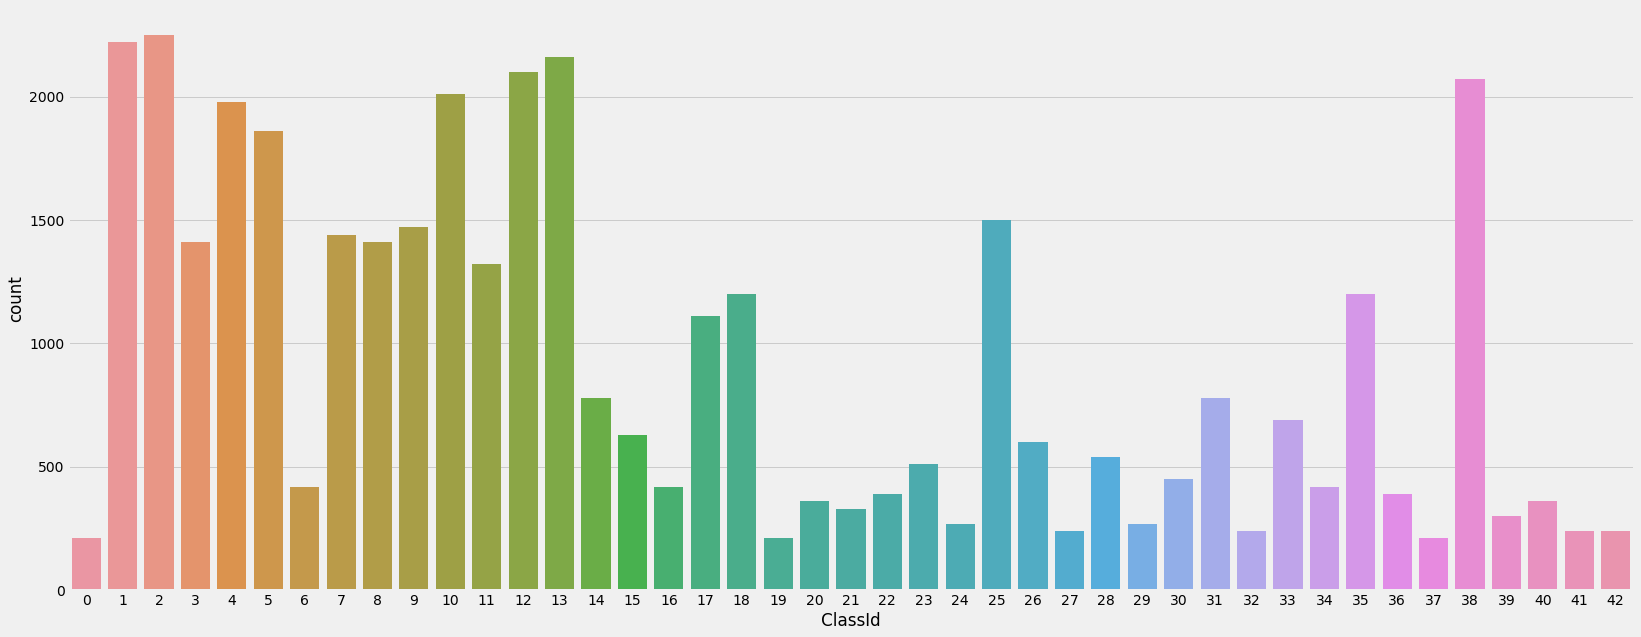

In [12]:
#Checking class distribution in train data before assigning labels
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((25,10))
sns.countplot(data = df_train, x = 'ClassId', )
plt.show()

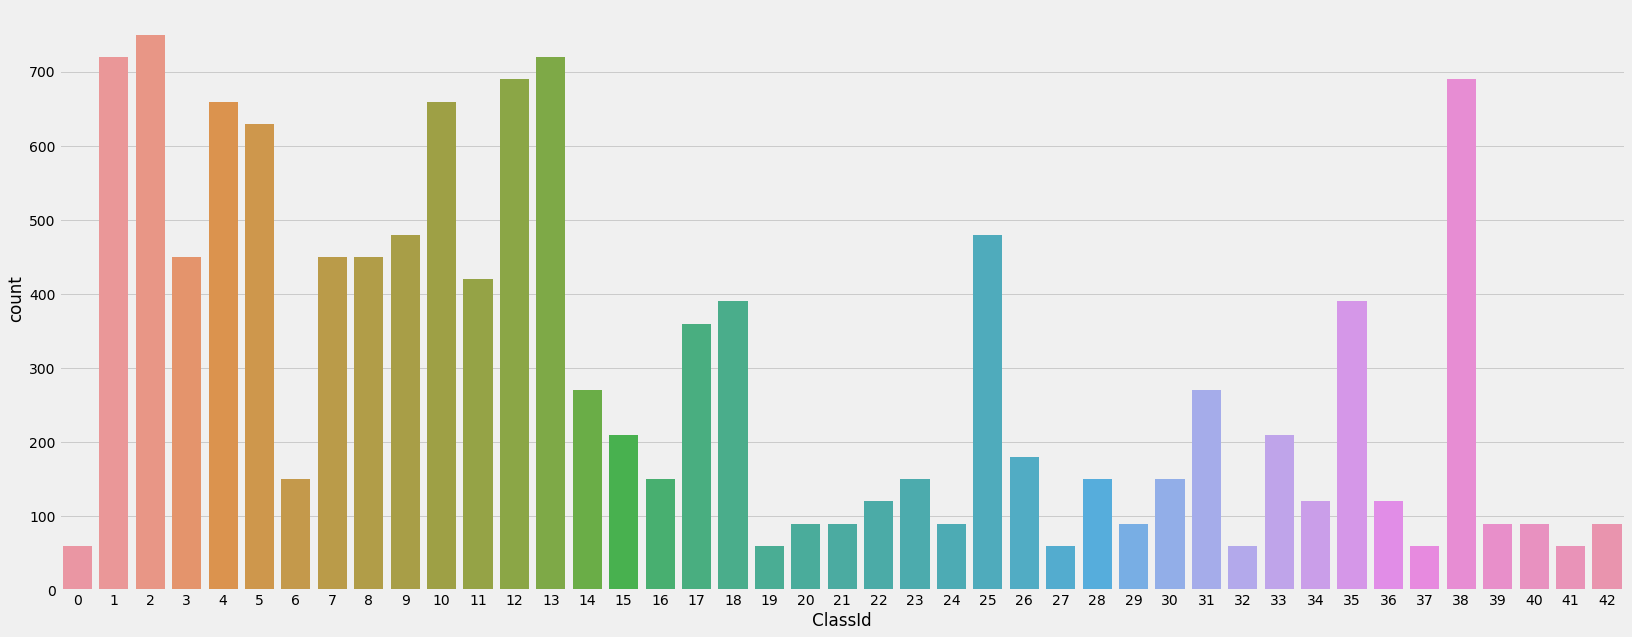

In [13]:
#Checking class distribution in test data before assigning labels
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((25,10))
sns.countplot(data = df_test, x = 'ClassId', )
plt.show()

In [14]:
classes={
    0:'Speed limit (20Km/Hr)',
    1:'Speed limit (30Km/Hr)',
    2:'Speed limit (50Km/Hr)',
    3:'Speed limit (60Km/Hr)',
    4:'Speed limit (70Km/Hr)',
    5:'Speed limit (80Km/Hr)',
    6:'End of Speed limit (80Km/Hr)',
    7:'Speed limit (100Km/Hr)',
    8:'Speed limit (120Km/Hr)',
    9:'No passing',
    10:'No passing vehicle over 3.5 tons',
    11:'Right of way at the intersection',
    12:'Priority road',
    13:'Yield',
    14:'Stop',
    15:'No Vehicles',
    16:'Vehicles more than 3.5 tons prohibited',
    17:'No entry',
    18:'General Caution',
    19:'Dangerous Curve Left',
    20:'Dangerous Curve Right',
    21:'Double Curve',
    22:'Bumpy Road',
    23:'Slippery Road',
    24:'Road narrows on the right',
    25:'Road work',
    26:'Traffic Signals',
    27:'Pedestrians',
    28:'Children Crossing',
    29:'Bicycles Crossing',
    30:'Beware of Ice/Snow',
    31:'Wild Animals Crossing',
    32:'End Speed and passing limits',
    33:'Turn right ahead',
    34:'Turn left ahead',
    35:'Ahead only',
    36:'Go straight or right',
    37:'Go straight or left',
    38:'Keep Right',
    39:'Keep Left',
    40:'Roundabout Mandatory',
    41:'End of no passing',
    42:'End of passing vehicles more than 3.5 tons' }




In [15]:
print("No of images in train data : {0}".format(df_train.shape[0]))
print("No of images in test data : {0}".format(df_test.shape[0]))

No of images in train data : 39209
No of images in test data : 12630


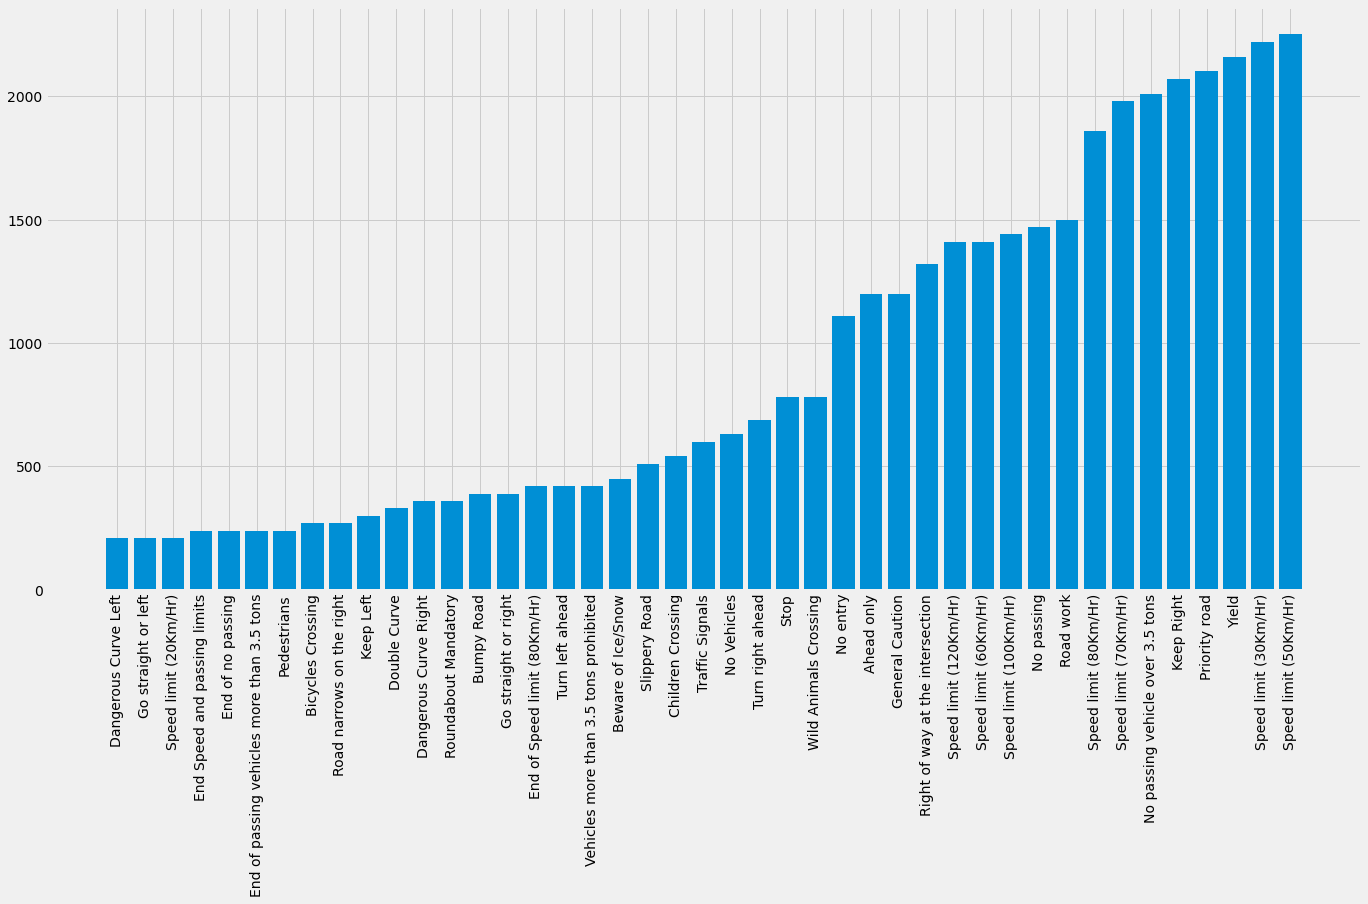

In [16]:
folders=os.listdir(train_path)
train_number=[]
class_num=[]

for folder in folders:
  train_files=os.listdir(train_path +'/'+ folder)
  train_number.append(len(train_files))
  class_num.append(classes[int(folder)])

#Sorting the dataset on the basis of number of images in every class

zipped_list=zip(train_number,class_num)
sorted_pairs=sorted(zipped_list)
tuples=zip(*sorted_pairs)
train_number,class_num=[list(tuple) for tuple in tuples]

#Plotting the number of images in each class

plt.figure(figsize=(21,10))
plt.bar(class_num,train_number)
plt.xticks(class_num,rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

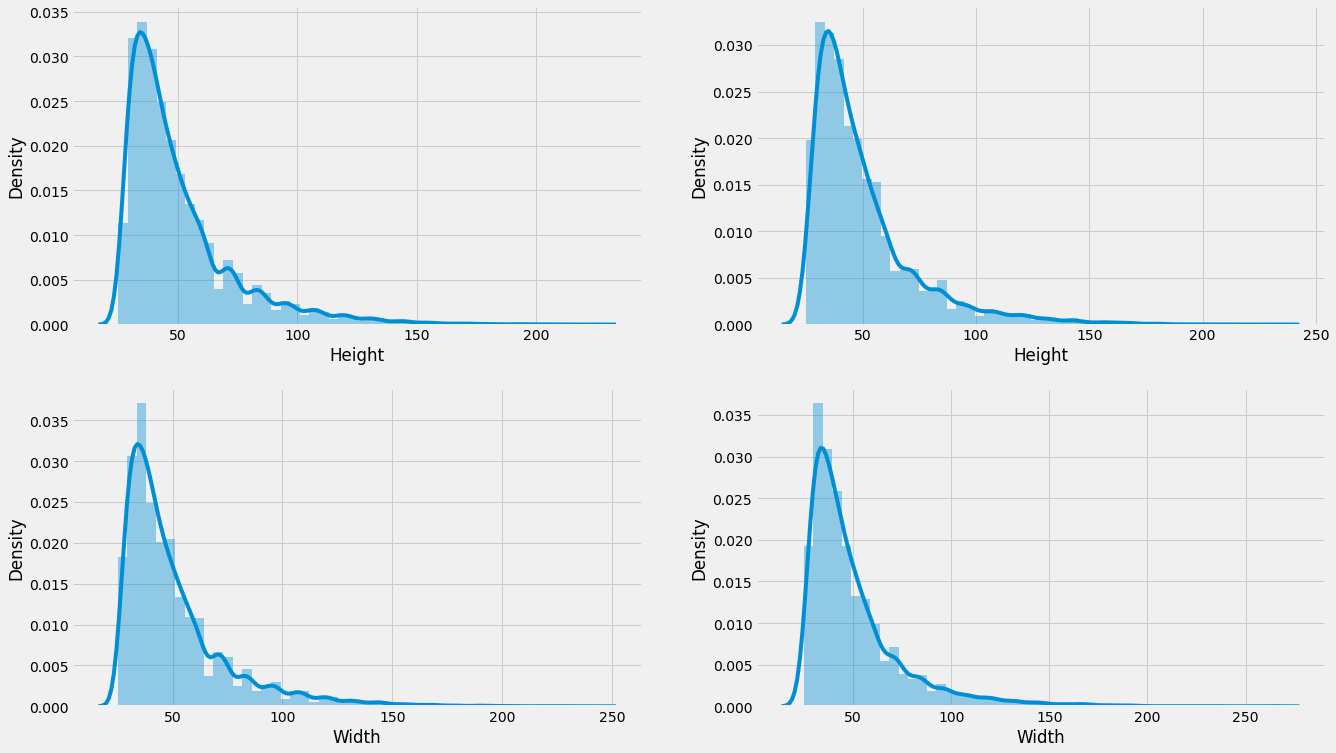

In [17]:
#Distplot for Height and Width of images in train data
fig, ax = plt.subplots(2, 2)
fig.set_size_inches((20,12))
sns.distplot(df_train['Height'], ax = ax[0][0])
fig.set_size_inches((20,12))
sns.distplot(df_test['Height'], ax = ax[0][1])
fig.set_size_inches((20,12))
sns.distplot(df_train['Width'], ax = ax[1][0])
fig.set_size_inches((20,12))
sns.distplot(df_test['Width'], ax = ax[1][1])
plt.show()

**From the above graphs could observe that both the train and test images follow similar height and width distribution**

**Visulaizing around 25 random images from test data**

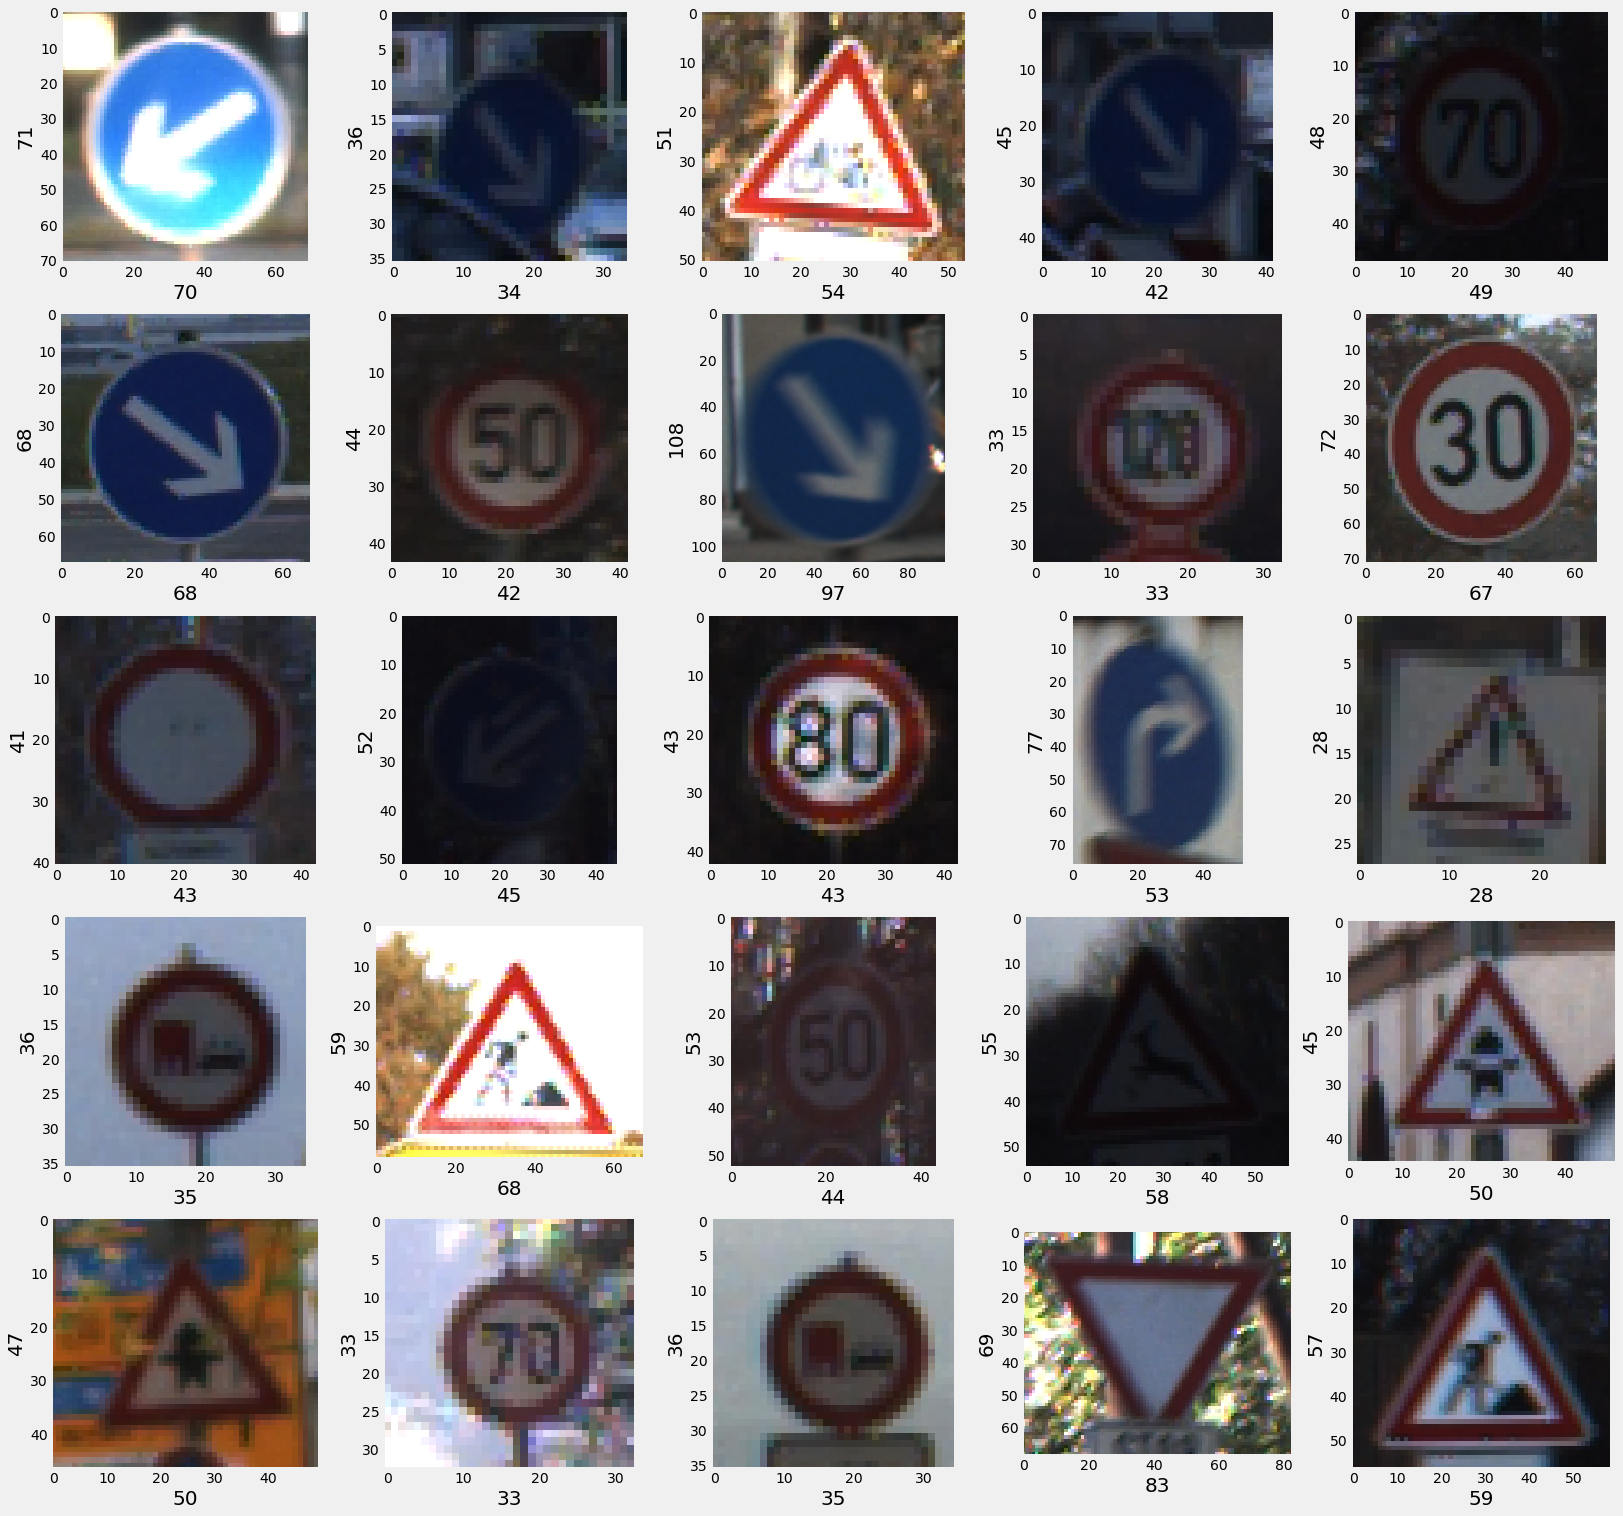

In [18]:
import random
from matplotlib.image import imread

test=pd.read_csv(data_dir_path+ '/Test.csv')
imgs=test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
  plt.subplot(5,5,i)
  random_img_path=data_dir_path+'/'+random.choice(imgs)
  rand_img=imread(random_img_path)
  plt.imshow(rand_img)
  plt.grid(b=None)
  plt.xlabel(rand_img.shape[1],fontsize=20)
  plt.ylabel(rand_img.shape[0],fontsize=20)

**Training_Data_Collection**

In [19]:
image_data=[]
image_labels=[]

for i in range(num_categories):
  path=data_dir_path+'/Train/' + str(i)
  images=os.listdir(path)

  for img in images:
    try:
      image=cv2.imread(path+'/'+img)
      image_fromarray=Image.fromarray(image,'RGB')
      resize_image=image_fromarray.resize((IMG_HEIGHT,IMG_WIDTH))
      image_data.append(np.array(resize_image))
      image_labels.append(i)
    except:
      print("Error in" +img )

#Changing the list to numpy array

image_data=np.array(image_data)
image_labels=np.array(image_labels)

print(image_data.shape,image_labels.shape)


(39209, 30, 30, 3) (39209,)


**Training_Data_Shuffle**

In [20]:
shuffle_indexes=np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data=image_data[shuffle_indexes]
image_labels=image_labels[shuffle_indexes]

**Splitting the data into train and validation dataset**

In [21]:
X_train,X_val,y_train,y_val=train_test_split(image_data,image_labels,test_size=0.3,random_state=42,shuffle=True)

X_train=X_train/255
X_val=X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape",X_val.shape)
print("y_train.shape",y_train.shape)
print("y_valid.shape",y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


**One hot encoding the labels** 

In [22]:
y_train=keras.utils.to_categorical(y_train,num_categories)
y_val=keras.utils.to_categorical(y_val,num_categories)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


**Modelling**

In [23]:
model=keras.models.Sequential([
  keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
  keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPool2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(axis=-1),

  keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
  keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPool2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(axis=-1),

  keras.layers.Flatten(),
  keras.layers.Dense(512,activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(rate=0.5),

  keras.layers.Dense(43,activation='softmax')

])

In [29]:
lr=0.001
epochs=30
opt=Adam(lr=lr,decay=lr/(epochs*0.5))
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Augmenting and Training the model**

In [25]:
aug=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest"
)

history=model.fit(aug.flow(X_train,y_train,batch_size=32),epochs=epochs,validation_data=(X_val,y_val))

Epoch 1/30
858/858 [==============================] - 29s 21ms/step - loss: 1.0581 - accuracy: 0.7132 - val_loss: 0.0690 - val_accuracy: 0.9804
Epoch 2/30
858/858 [==============================] - 17s 20ms/step - loss: 0.1681 - accuracy: 0.9496 - val_loss: 0.0760 - val_accuracy: 0.9768
Epoch 3/30
858/858 [==============================] - 17s 20ms/step - loss: 0.1077 - accuracy: 0.9667 - val_loss: 0.0491 - val_accuracy: 0.9838
Epoch 4/30
858/858 [==============================] - 17s 19ms/step - loss: 0.0766 - accuracy: 0.9756 - val_loss: 0.0168 - val_accuracy: 0.9935
Epoch 5/30
858/858 [==============================] - 17s 20ms/step - loss: 0.0650 - accuracy: 0.9800 - val_loss: 0.0129 - val_accuracy: 0.9961
Epoch 6/30
858/858 [==============================] - 17s 20ms/step - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0176 - val_accuracy: 0.9946
Epoch 7/30
858/858 [==============================] - 17s 20ms/step - loss: 0.0478 - accuracy: 0.9846 - val_loss: 0.0187 - val_accuracy:

In [30]:
model.save("model_traffic_sign")

INFO:tensorflow:Assets written to: model_traffic_sign/assets


**Model Evaluation**

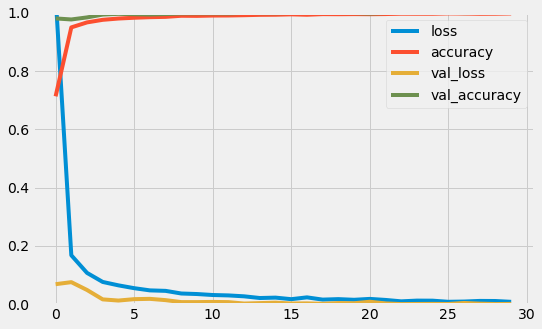

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

**Loading test data and running the predictions**

In [42]:
test=pd.read_csv(data_dir_path+'/Test.csv')

labels=test["ClassId"].values
imgs=test["Path"].values

data=[]

for img in imgs:
  try:
    image=cv2.imread(data_dir_path + '/'+img)
    image_fromarray=Image.fromarray(image,'RGB')
    resize_image=image_fromarray.resize((IMG_HEIGHT,IMG_WIDTH))
    data.append(np.array(resize_image))
  except:
    print("Error in "+img)
X_test=np.array(data)
X_test=X_test/255

#pred=model.predict(X_test)
pred=np.argmax(model.predict(X_test),axis=1)
 

In [43]:
 #Accuracy with the test data 

print('Test data accuracy :',accuracy_score(labels,pred)*100)

Test data accuracy : 98.2185273159145


**Classification_Report**

In [44]:
from sklearn.metrics import classification_report

print(classification_report(labels,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      1.00      0.99       720
           2       0.97      1.00      0.98       750
           3       0.96      0.99      0.97       450
           4       1.00      0.99      1.00       660
           5       0.98      0.97      0.98       630
           6       1.00      0.93      0.96       150
           7       1.00      1.00      1.00       450
           8       1.00      0.96      0.98       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      0.99      0.99       420
          12       0.98      0.98      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       1.00      1.00      1.00       150
          17       1.00    

**Predictions on Test_Data**

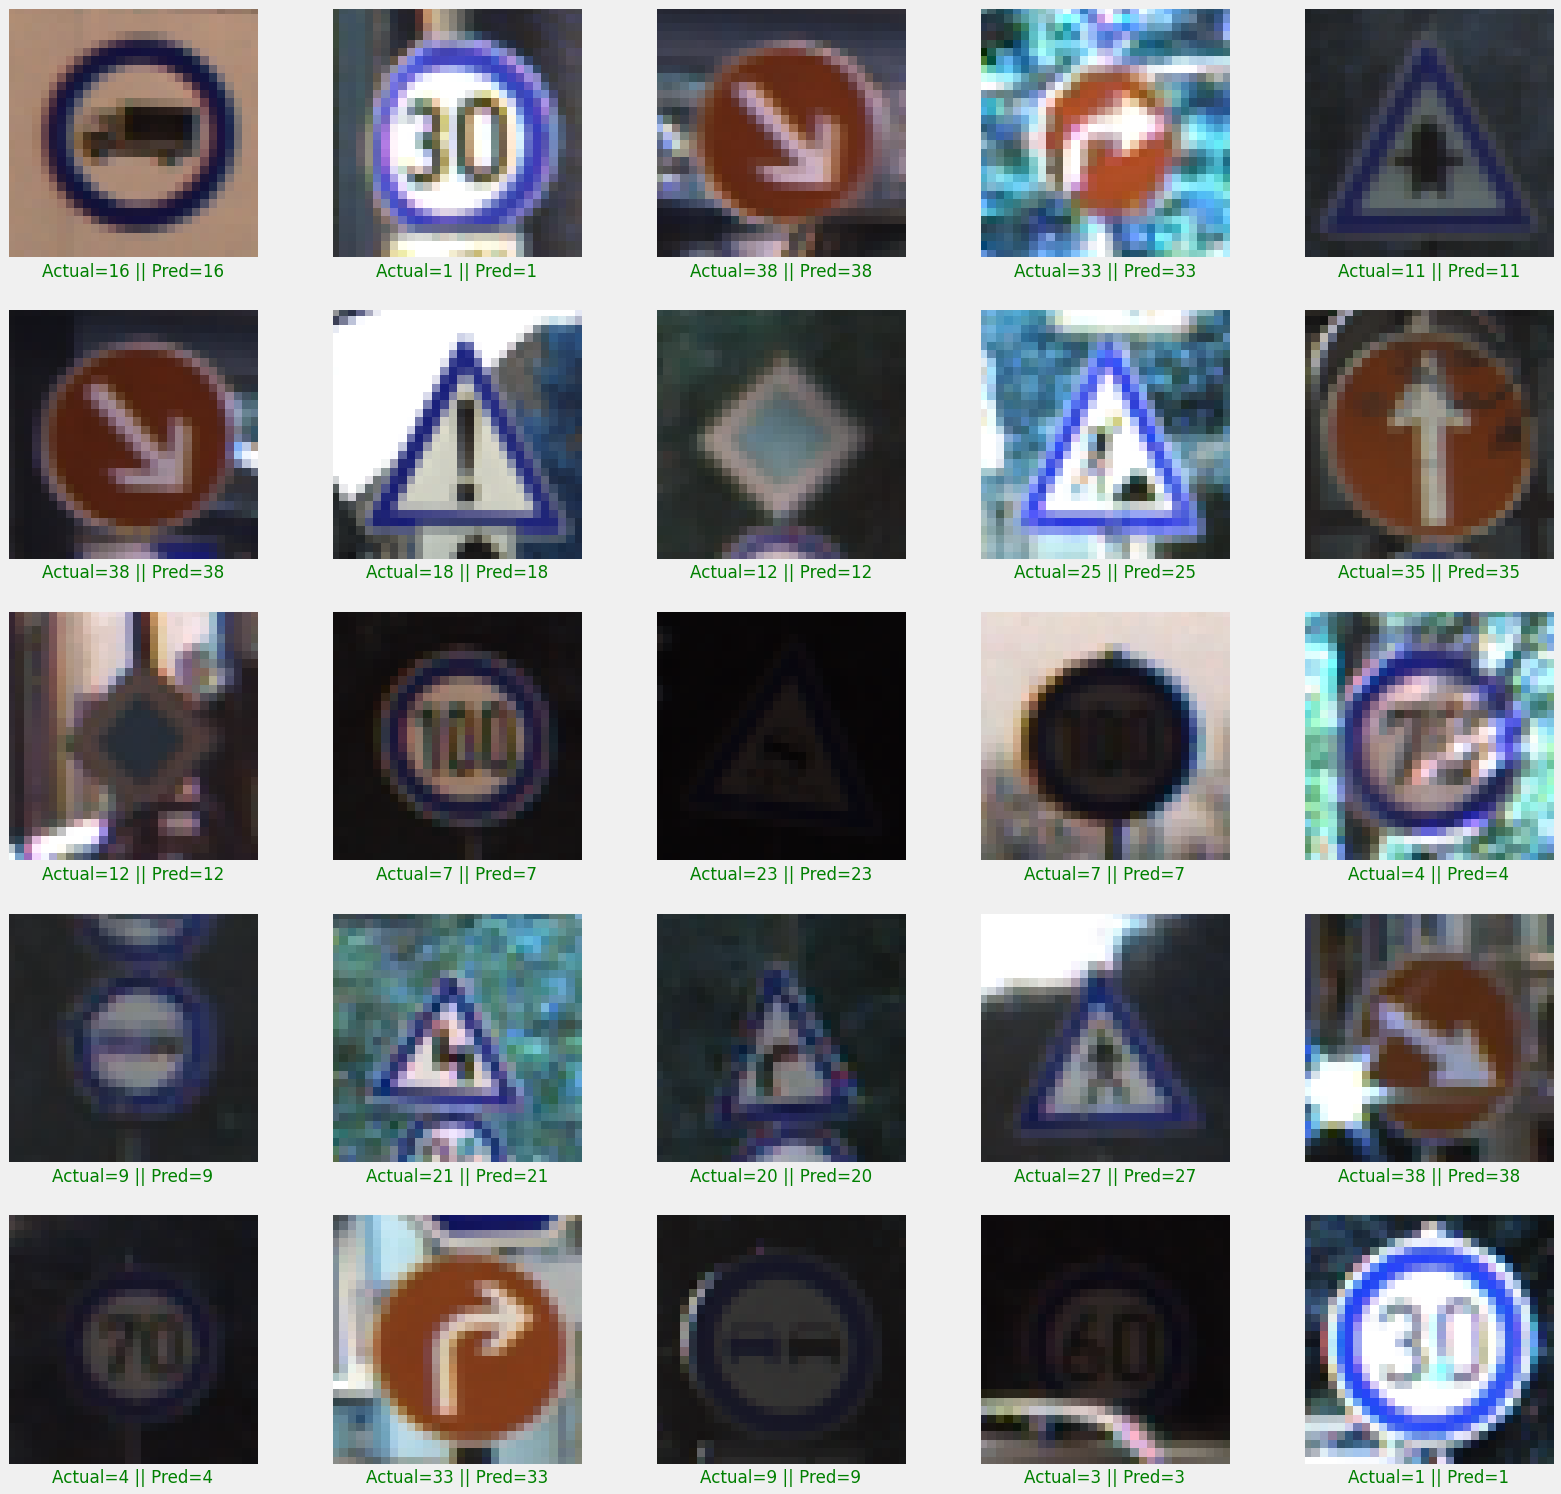

In [45]:
plt.figure(figsize=(25,25))

start_index=0
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  prediction=pred[start_index+i]
  actual=labels[start_index+i]
  col='g'
  if prediction!=actual:
    col='r'
  plt.xlabel('Actual={} || Pred={}'.format(actual,prediction),color=col)
  plt.imshow(X_test[start_index+i])
plt.show()